# Métodos Numéricos para Equações Diferenciais II – 2023/2

**Aluno:** Matheus de Costa Harduim.

**Professor:** Grazione de Souza.

**Instituição:** UERJ – IPRJ – DMC

### Desenvolvimento dos códigos e comentários.

Importando as bibliotecas do python que serão utilizadas

In [1]:
import numpy.matlib
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

# Trabalho 3

### Forward Time-Backward Space (FTBS)

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [2]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [3]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

In [4]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


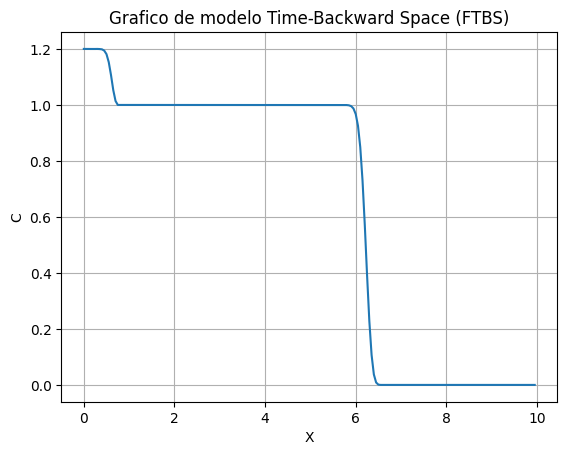

In [5]:
plt.figure()
plt.title(f'Grafico de modelo Time-Backward Space (FTBS)')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [6]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.2666666666666667
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.2
numero de passos de tempo: 25
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.13333333333333336
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.11428571428571431
numero de passos de tempo: 43


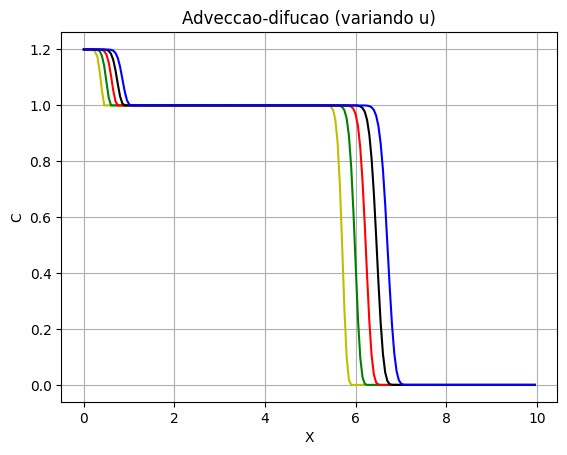

In [7]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [8]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 160
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 240
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 280
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


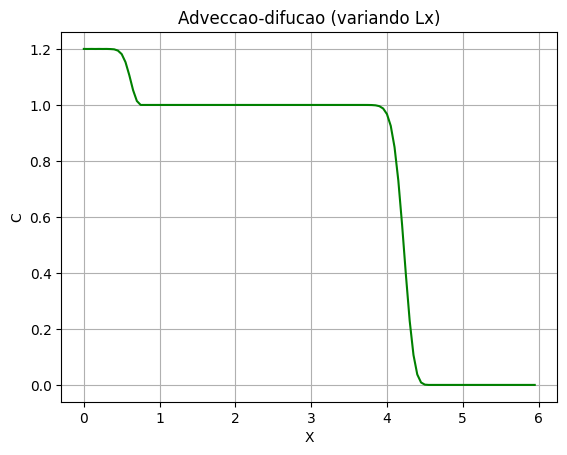

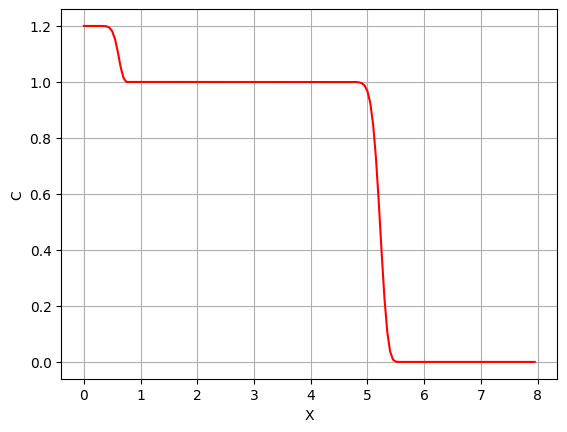

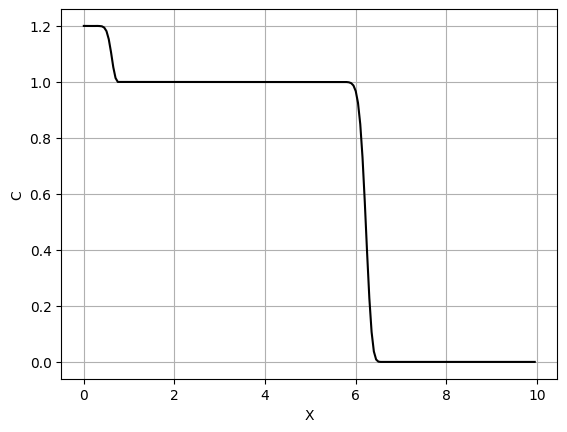

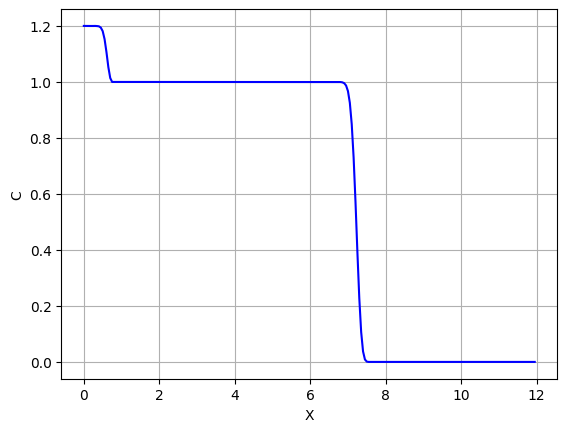

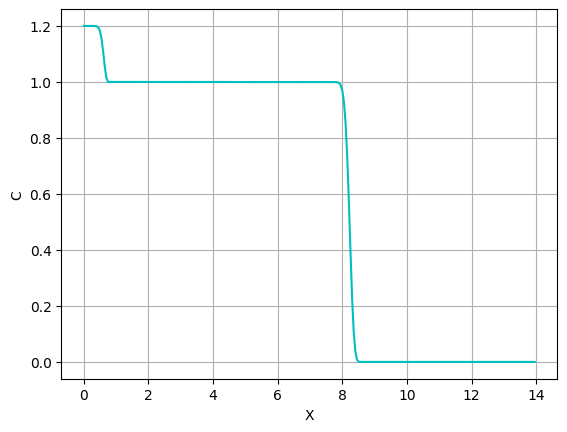

In [9]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [10]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 24
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 43


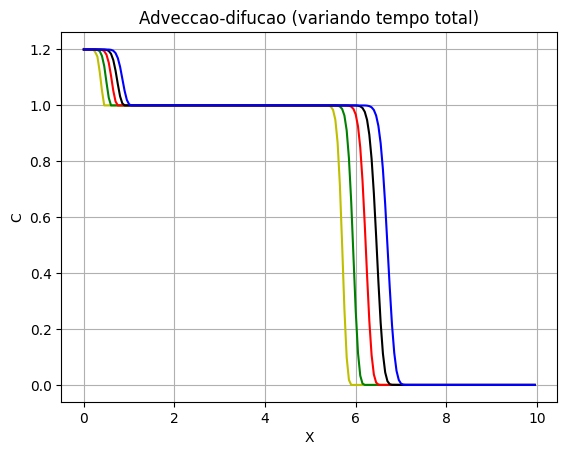

In [11]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [12]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.096
numero de passos de tempo: 52
numero de volumes: 249
valor passo de tempo deltaT: 0.12800000000000003
numero de passos de tempo: 39
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 166
valor passo de tempo deltaT: 0.192
numero de passos de tempo: 26
numero de volumes: 142
valor passo de tempo deltaT: 0.22399999999999998
numero de passos de tempo: 22


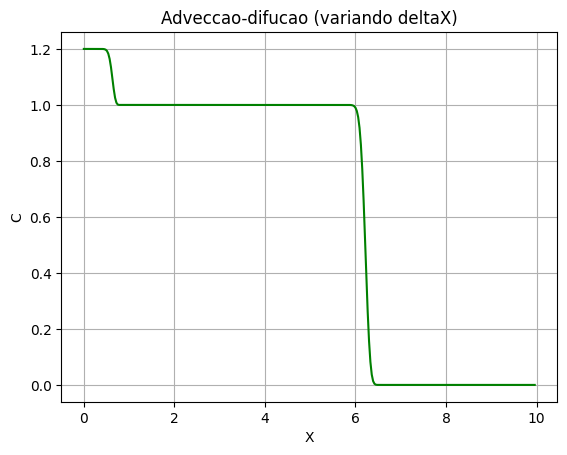

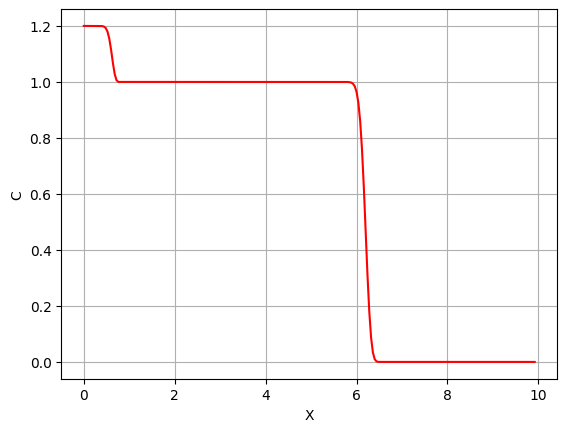

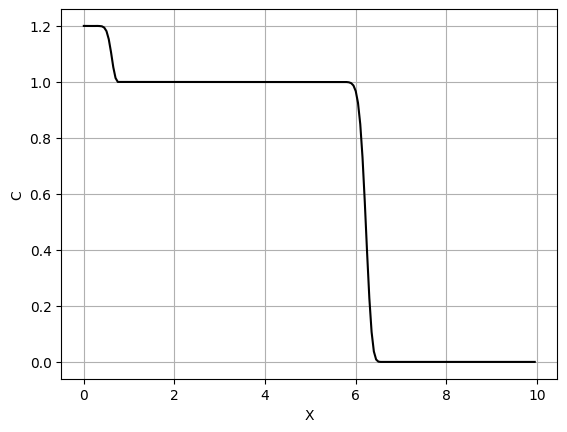

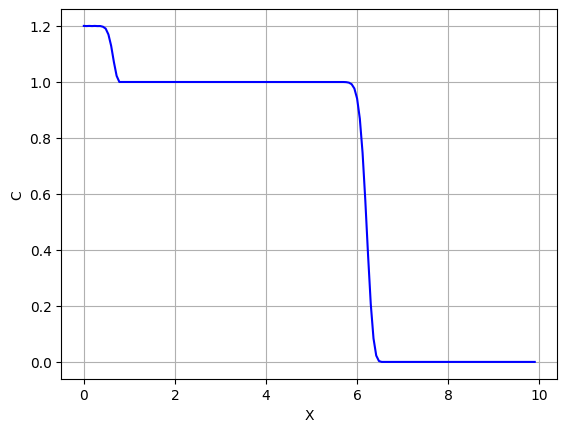

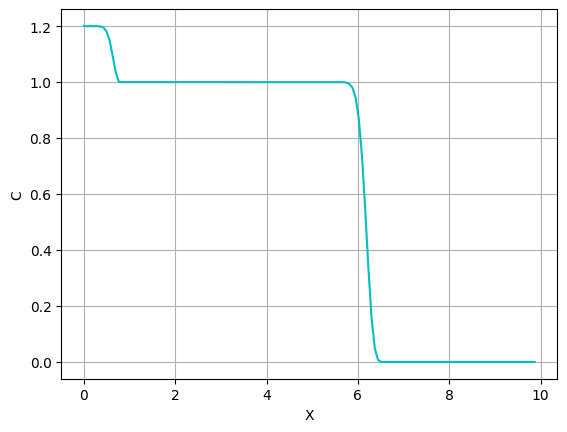

In [13]:
QsItr = []
xItr = []
for deltX in deltXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [14]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


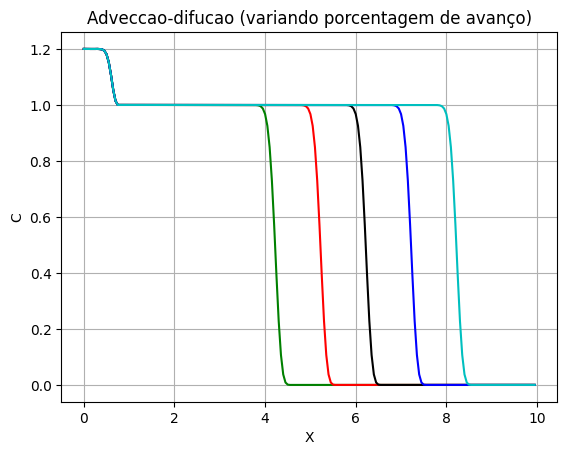

In [15]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [16]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [17]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


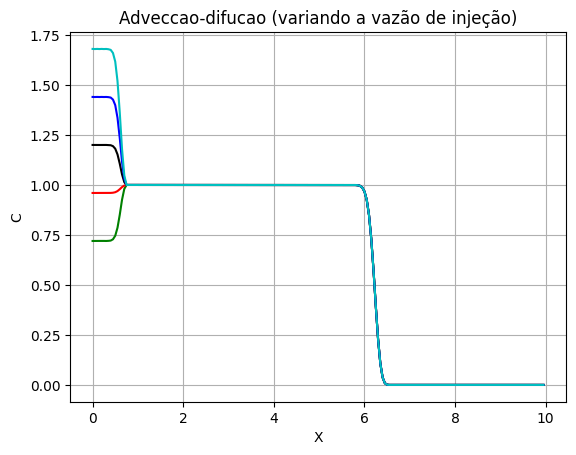

In [18]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [19]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
deltTs = 0.18*np.array([0.3,1.0,1.7])
# percentual de como os volumes estam preenchidos

In [20]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.9*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.054
numero de passos de tempo: 92
numero de volumes: 200
valor passo de tempo deltaT: 0.18
numero de passos de tempo: 27
numero de volumes: 200
valor passo de tempo deltaT: 0.306
numero de passos de tempo: 16


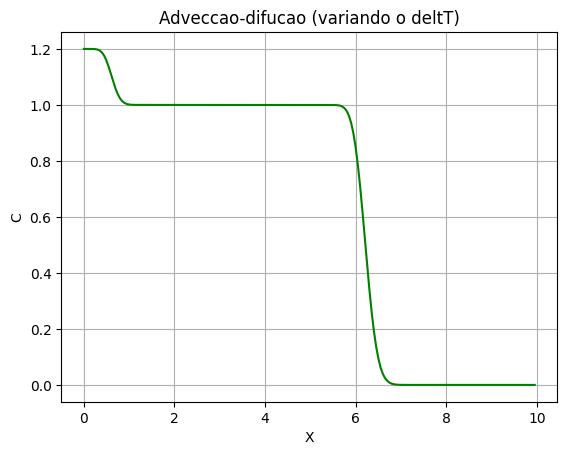

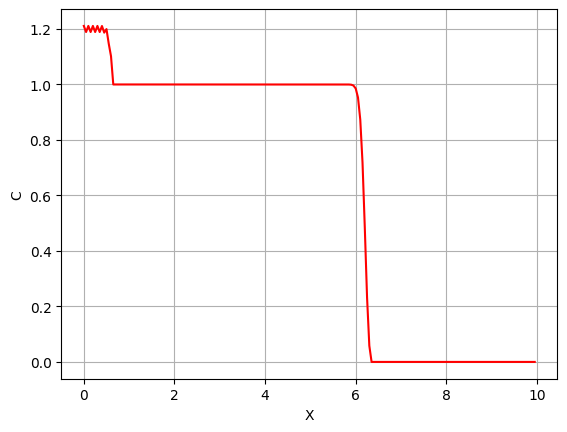

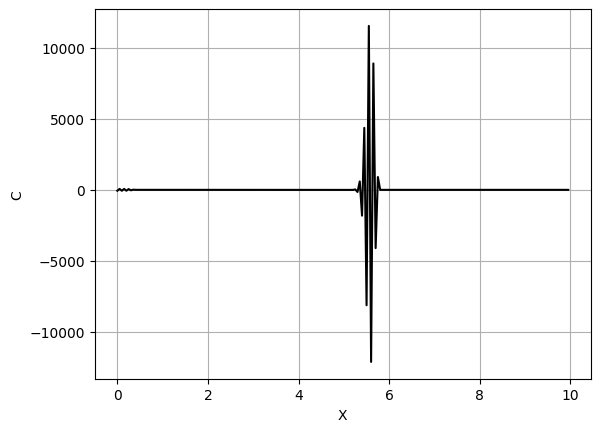

In [21]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

### van Leer

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [22]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [23]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

In [24]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


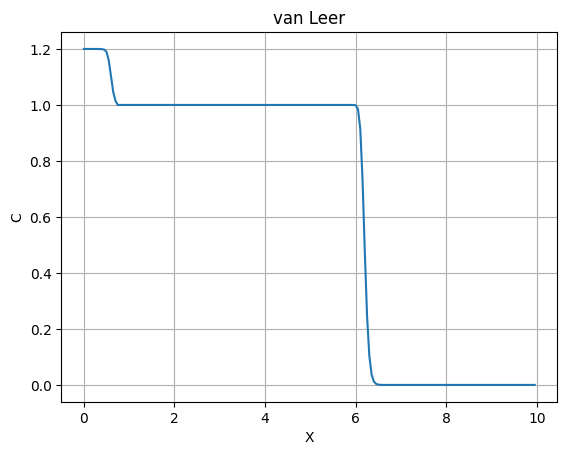

In [25]:
plt.figure()
plt.title(f'van Leer')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [26]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.2666666666666667
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.2
numero de passos de tempo: 25
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.13333333333333336
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.11428571428571431
numero de passos de tempo: 43


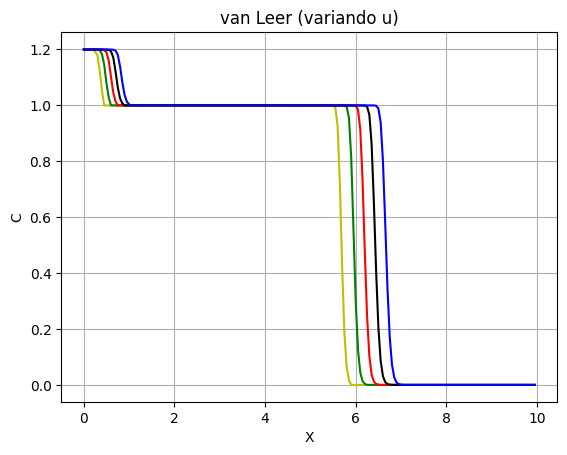

In [27]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'van Leer (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [28]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 160
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 240
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 280
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


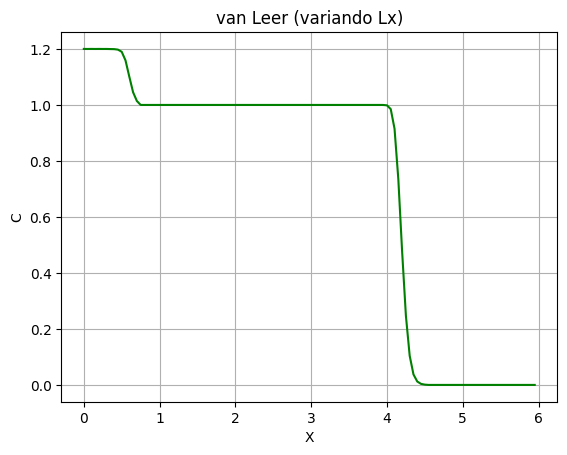

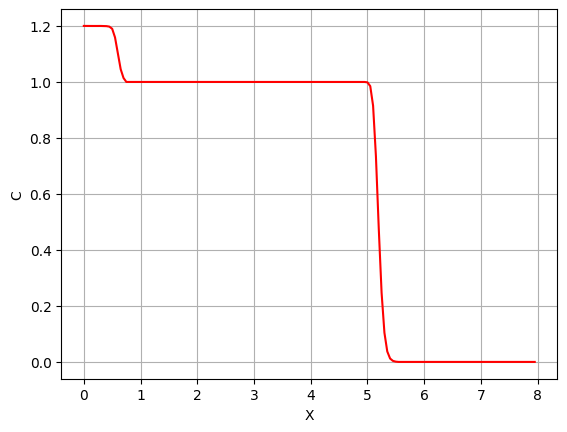

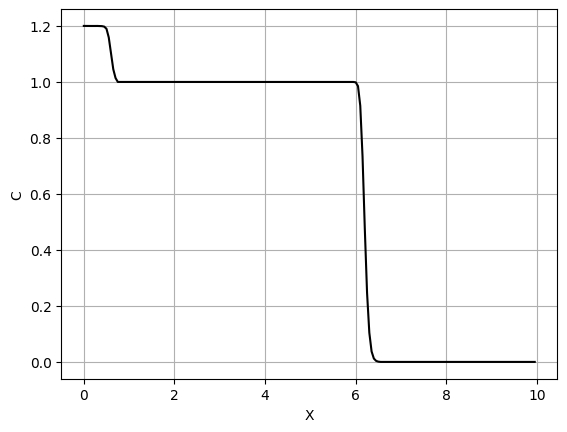

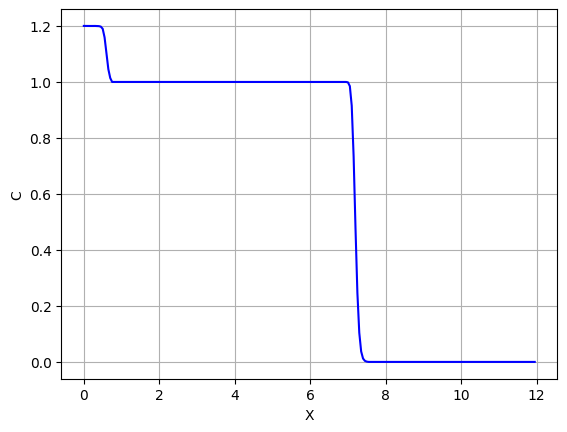

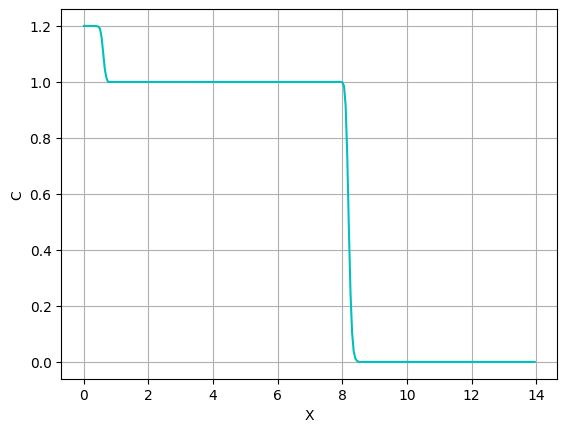

In [29]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [30]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 24
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 43


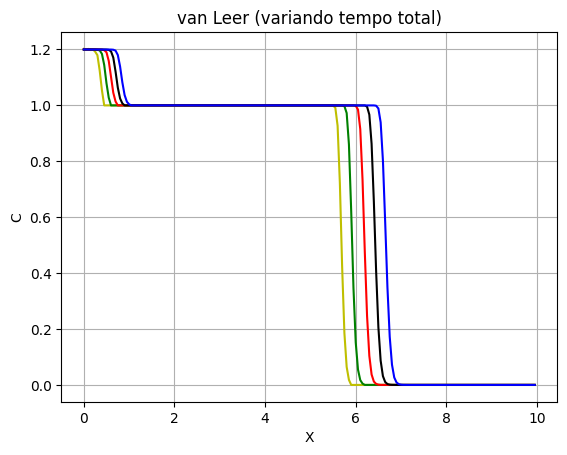

In [31]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'van Leer (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [32]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.096
numero de passos de tempo: 52
numero de volumes: 249
valor passo de tempo deltaT: 0.12800000000000003
numero de passos de tempo: 39
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 166
valor passo de tempo deltaT: 0.192
numero de passos de tempo: 26
numero de volumes: 142
valor passo de tempo deltaT: 0.22399999999999998
numero de passos de tempo: 22


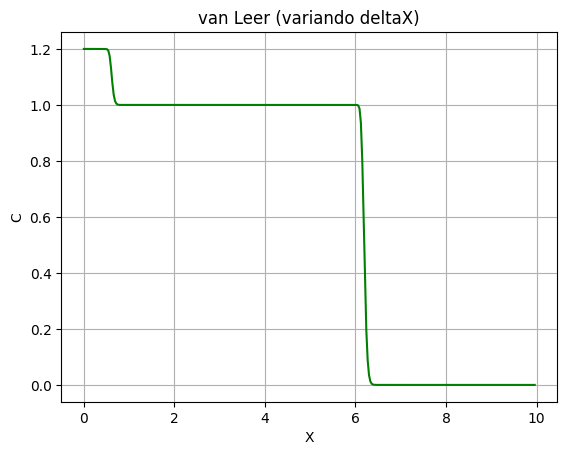

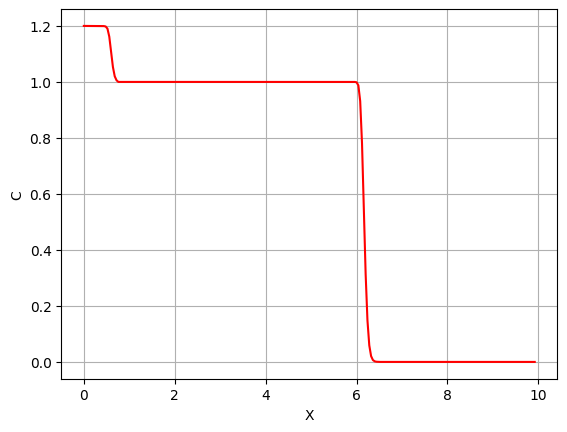

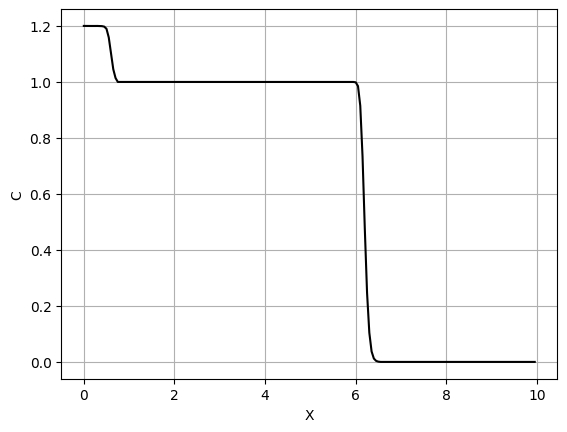

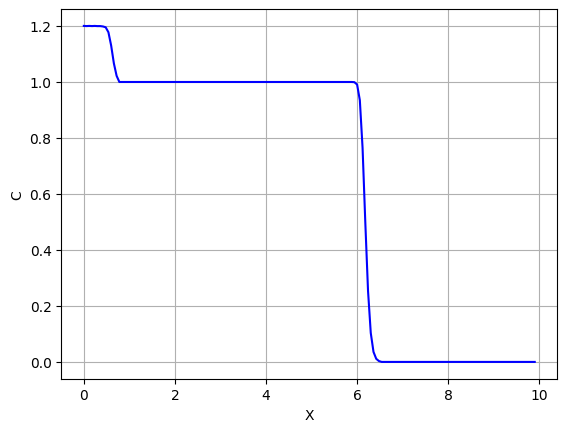

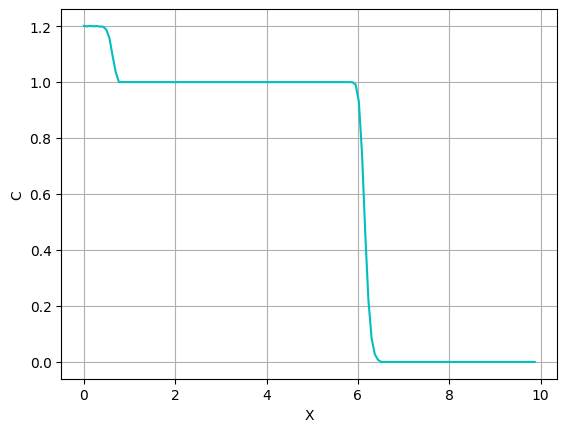

In [33]:
QsItr = []
xItr = []
for deltX in deltXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [34]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


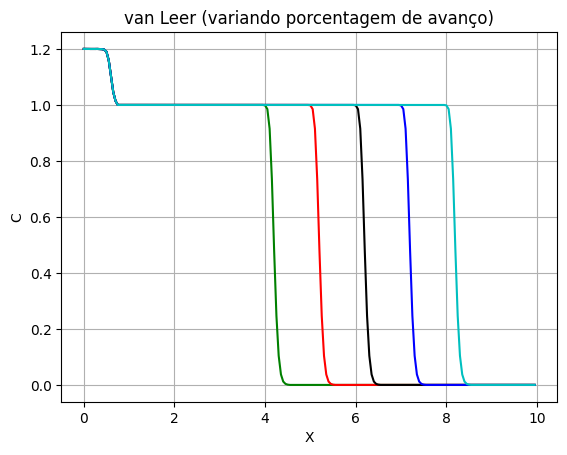

In [35]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [36]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [37]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


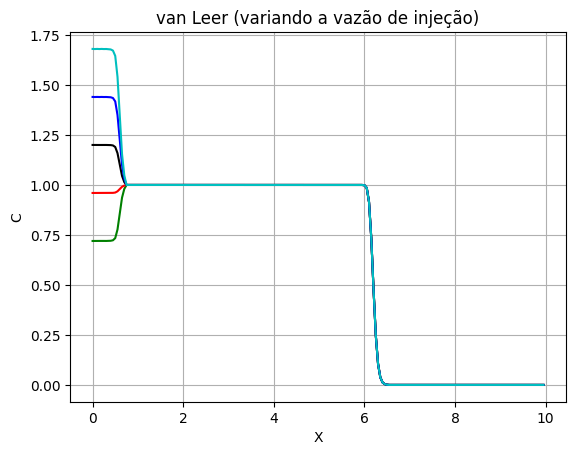

In [38]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [39]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
deltTs = 0.16*np.array([0.3,1.0,1.7])
# percentual de como os volumes estam preenchidos

In [40]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.9*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + abs(theta1_2)))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.048
numero de passos de tempo: 104
numero de volumes: 200
valor passo de tempo deltaT: 0.16
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.272
numero de passos de tempo: 18


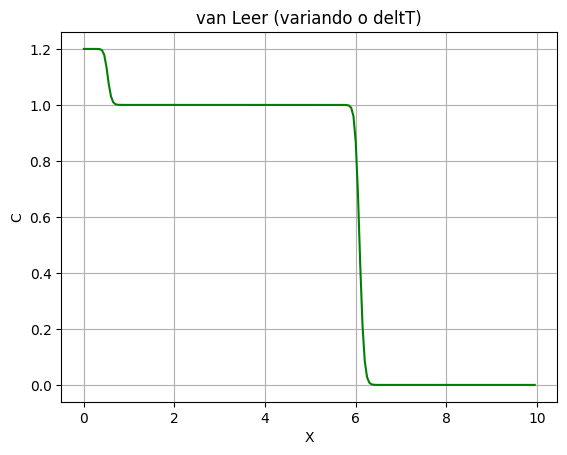

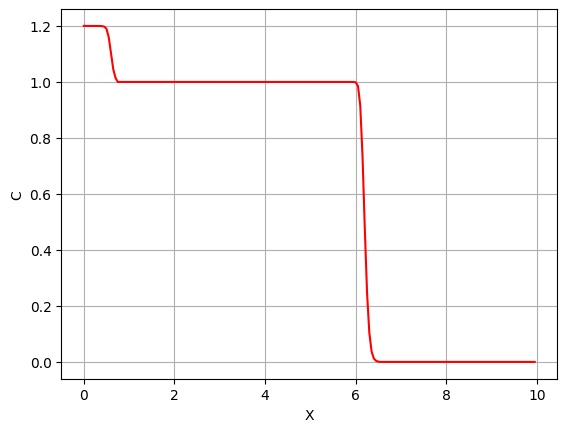

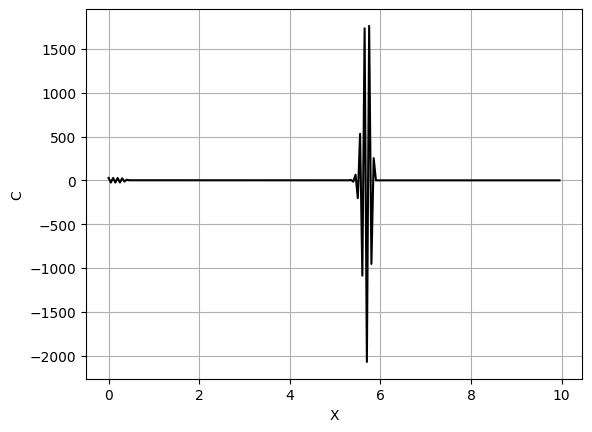

In [41]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

### HQUICK

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [42]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [43]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

In [44]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


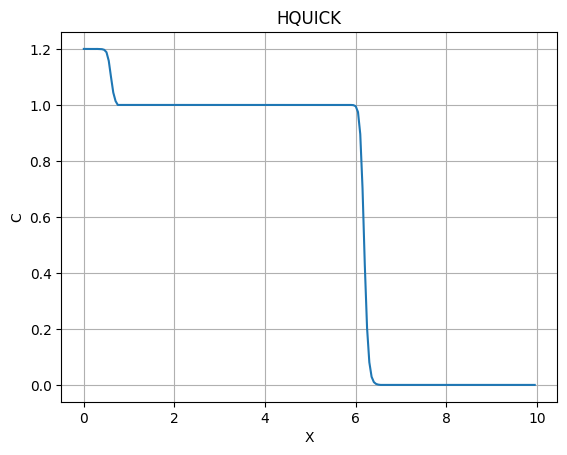

In [45]:
plt.figure()
plt.title(f'HQUICK')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [46]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.2666666666666667
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.2
numero de passos de tempo: 25
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.13333333333333336
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.11428571428571431
numero de passos de tempo: 43


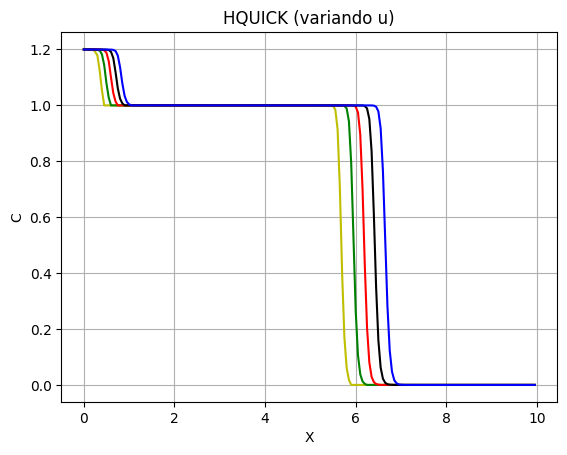

In [47]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'HQUICK (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [48]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 160
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 240
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 280
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


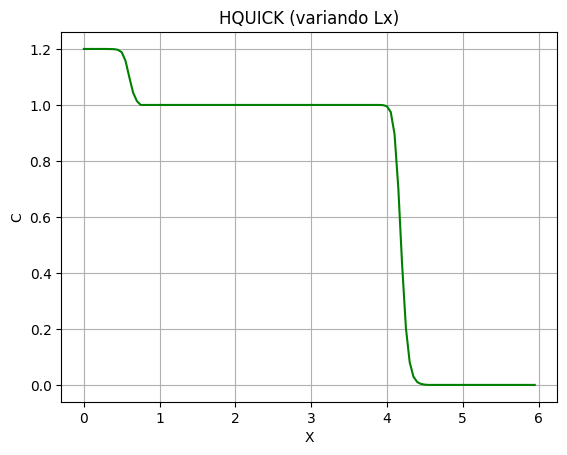

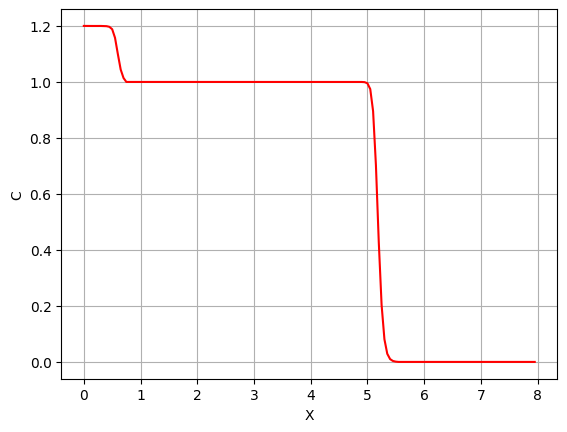

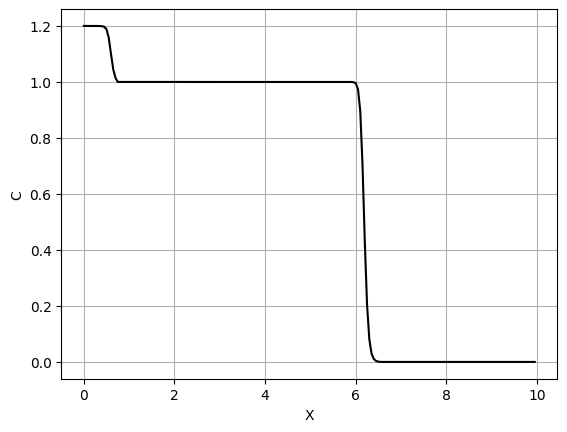

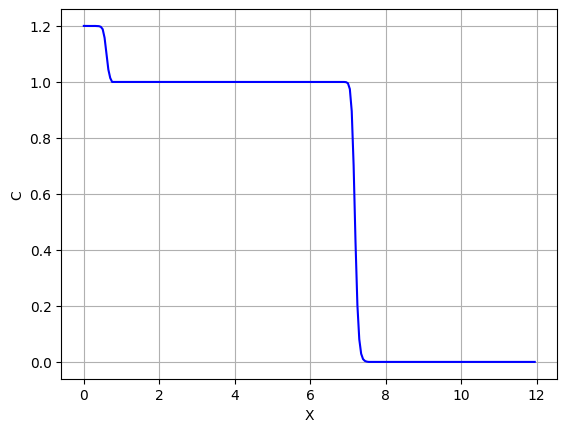

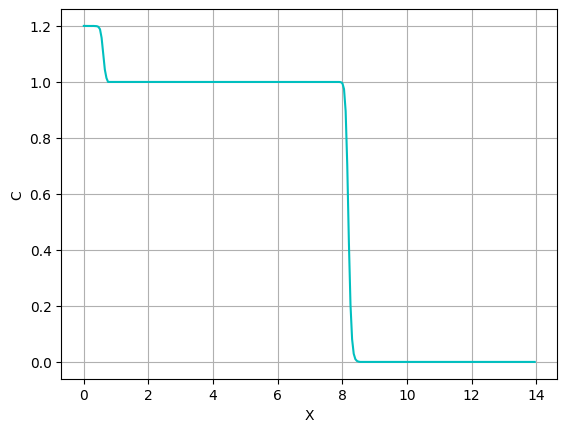

In [49]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'HQUICK (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [50]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 24
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 43


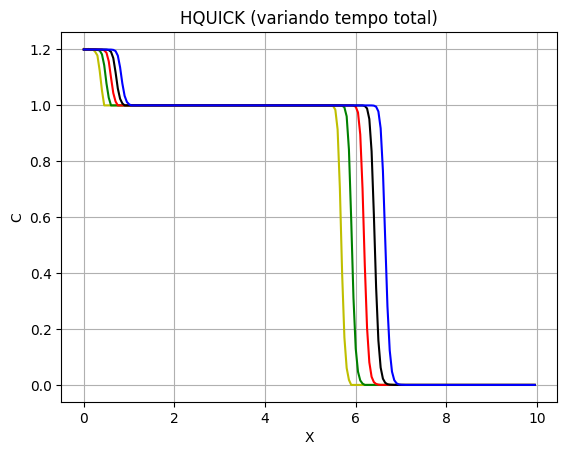

In [51]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'HQUICK (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [52]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.096
numero de passos de tempo: 52
numero de volumes: 249
valor passo de tempo deltaT: 0.12800000000000003
numero de passos de tempo: 39
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 166
valor passo de tempo deltaT: 0.192
numero de passos de tempo: 26
numero de volumes: 142
valor passo de tempo deltaT: 0.22399999999999998
numero de passos de tempo: 22


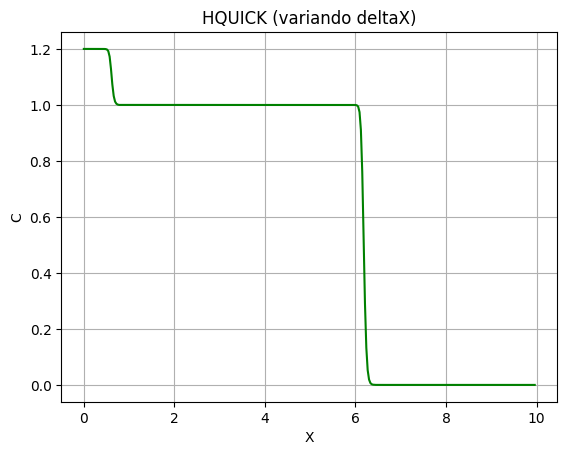

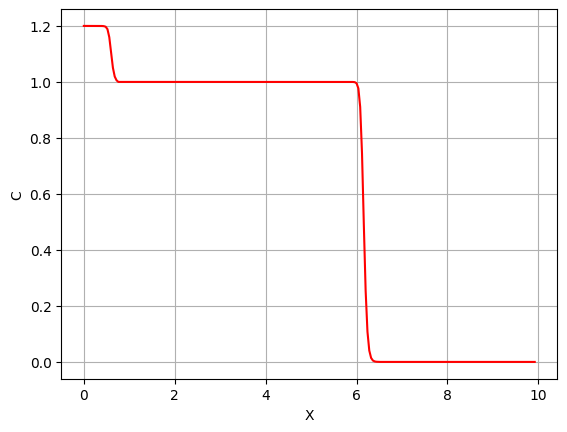

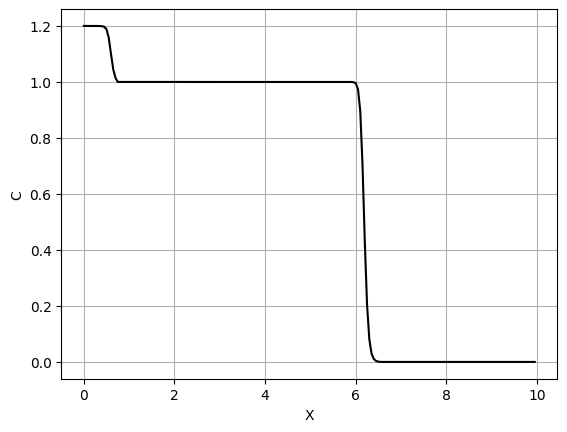

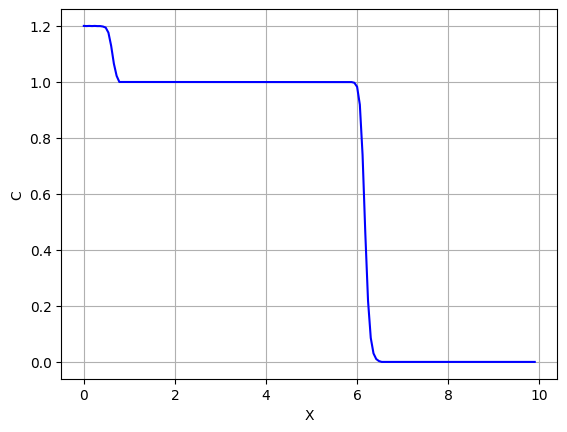

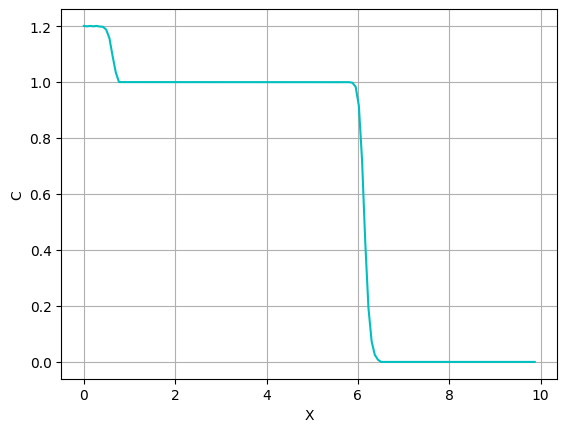

In [53]:
QsItr = []
xItr = []
for deltX in deltXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'HQUICK (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [54]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


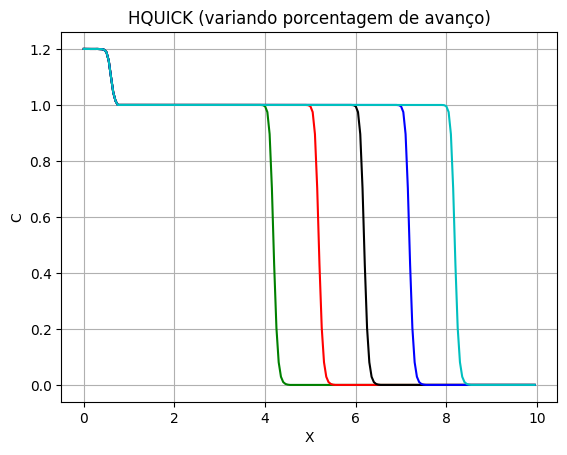

In [55]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'HQUICK (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [56]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [57]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


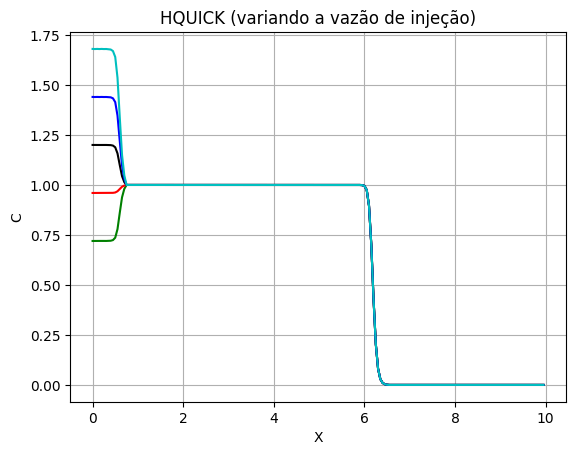

In [58]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'HQUICK (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [59]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
deltTs = 0.16*np.array([0.3,1.0,1.7])
# percentual de como os volumes estam preenchidos

In [60]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.9*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = (2*(theta1_2 + abs(theta1_2))/(3 + theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.048
numero de passos de tempo: 104
numero de volumes: 200
valor passo de tempo deltaT: 0.16
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.272
numero de passos de tempo: 18


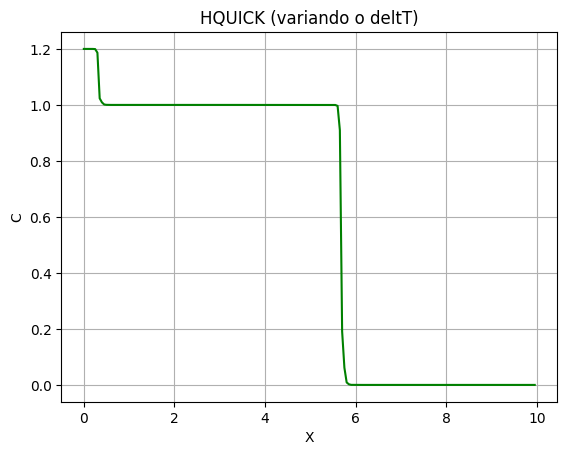

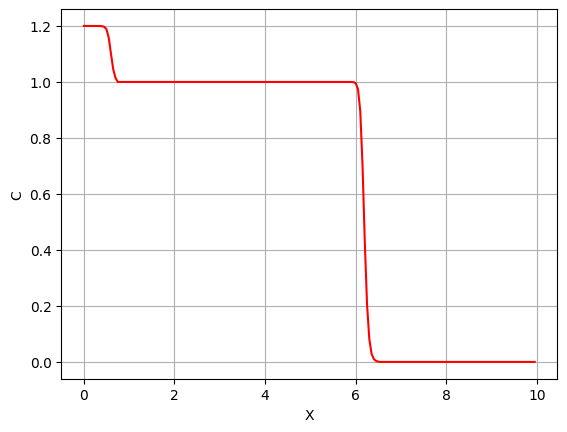

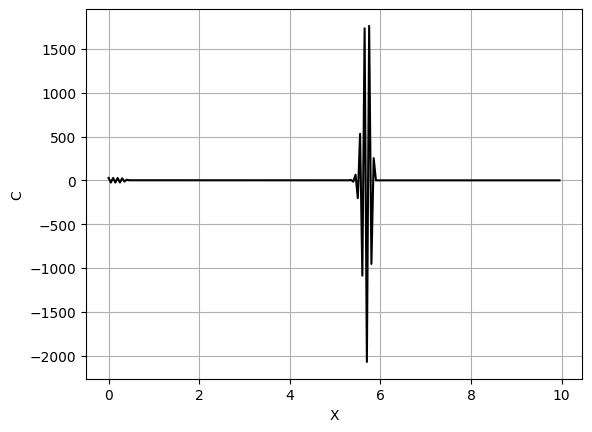

In [61]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'HQUICK (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

### Superbee

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [62]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [63]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

In [64]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


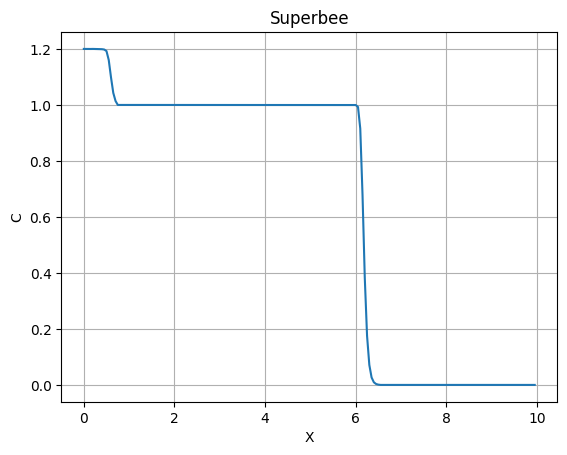

In [65]:
plt.figure()
plt.title(f'Superbee')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [66]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.2666666666666667
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.2
numero de passos de tempo: 25
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.13333333333333336
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.11428571428571431
numero de passos de tempo: 43


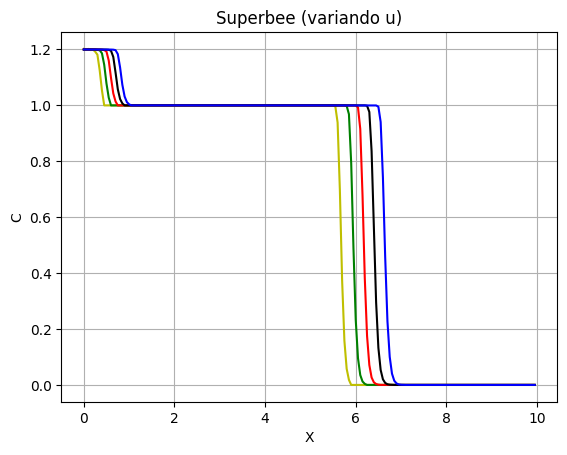

In [67]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Superbee (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [68]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 160
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 240
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 280
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


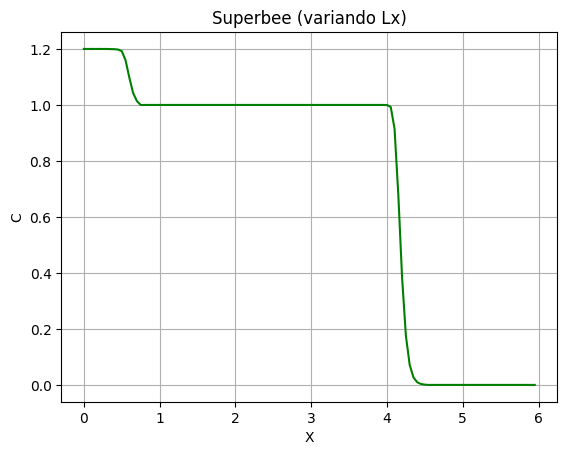

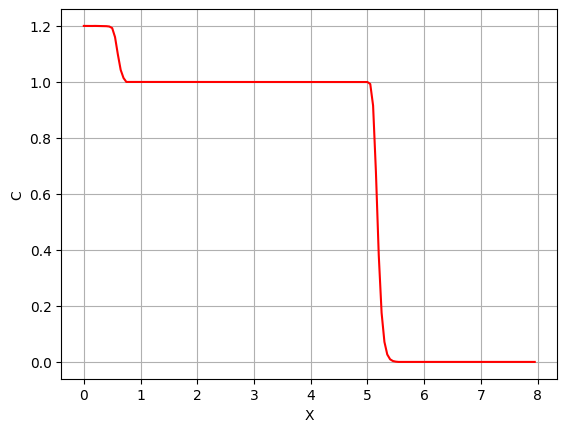

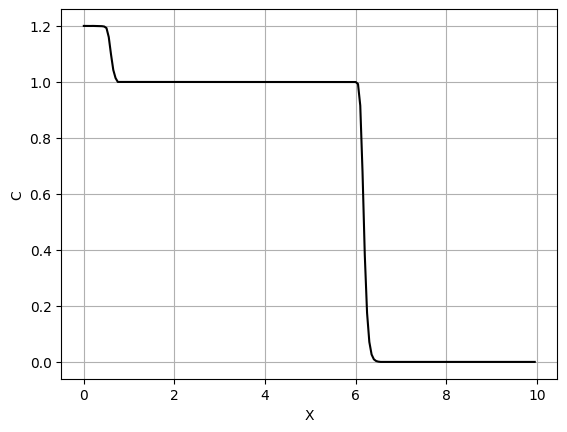

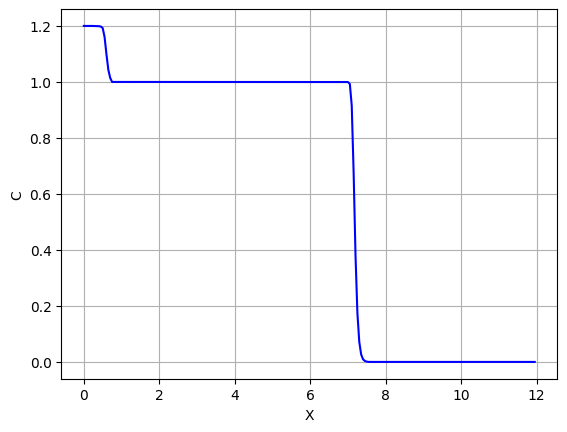

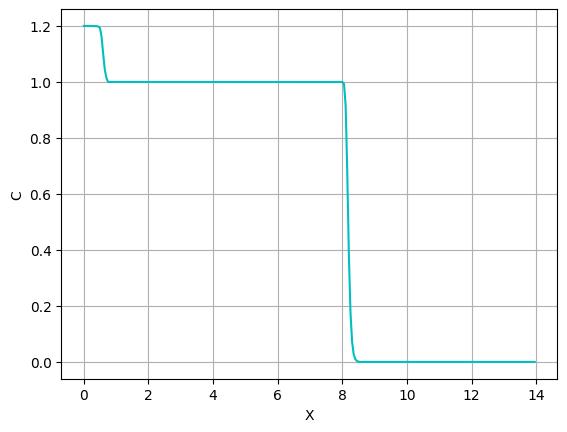

In [69]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Superbee (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [70]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 24
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 43


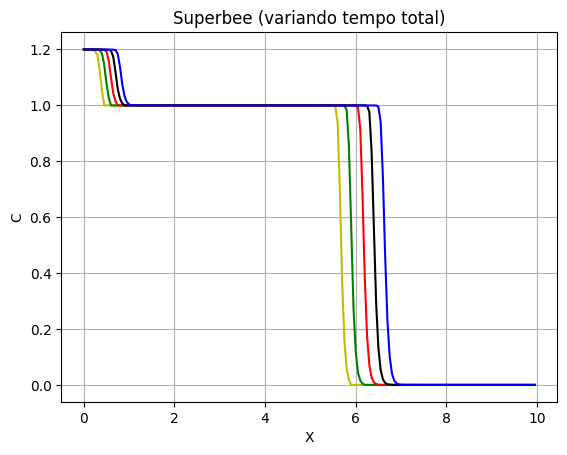

In [71]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Superbee (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [72]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.096
numero de passos de tempo: 52
numero de volumes: 249
valor passo de tempo deltaT: 0.12800000000000003
numero de passos de tempo: 39
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 166
valor passo de tempo deltaT: 0.192
numero de passos de tempo: 26
numero de volumes: 142
valor passo de tempo deltaT: 0.22399999999999998
numero de passos de tempo: 22


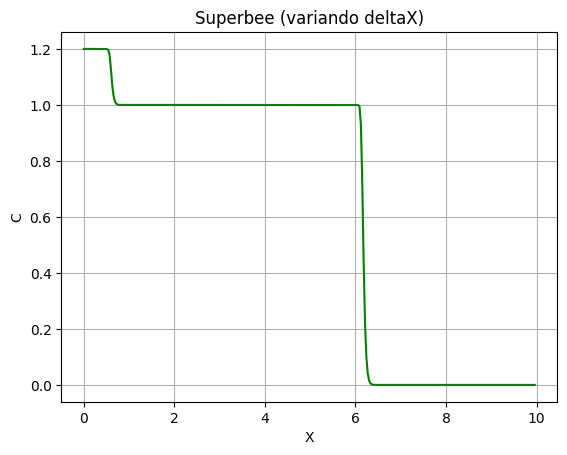

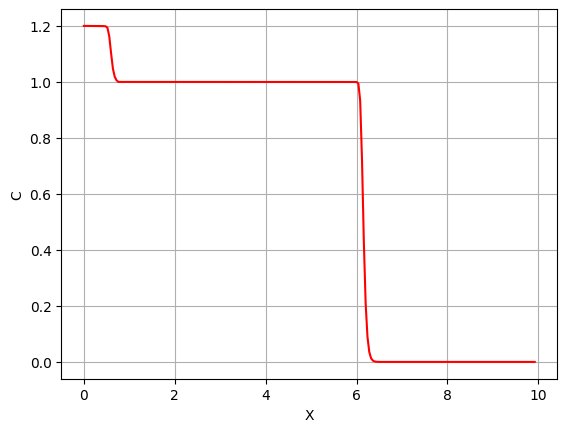

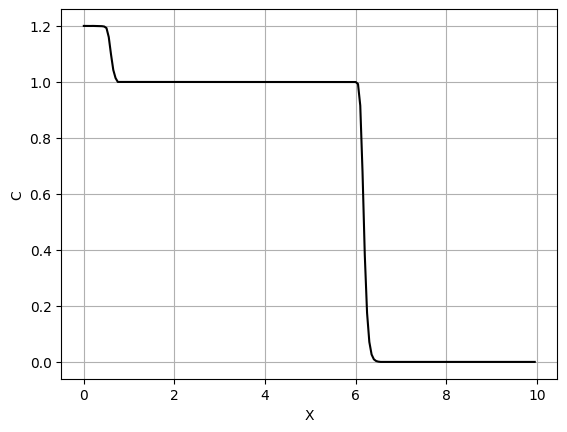

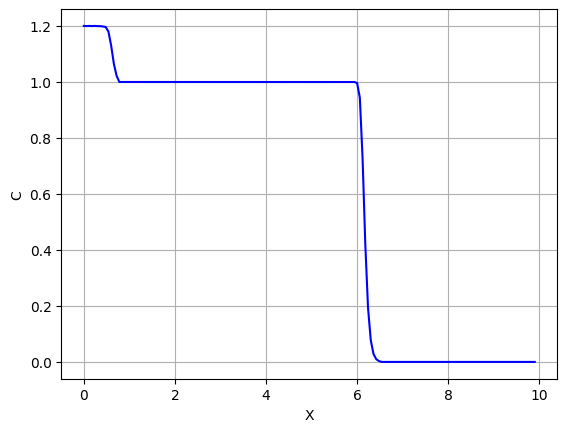

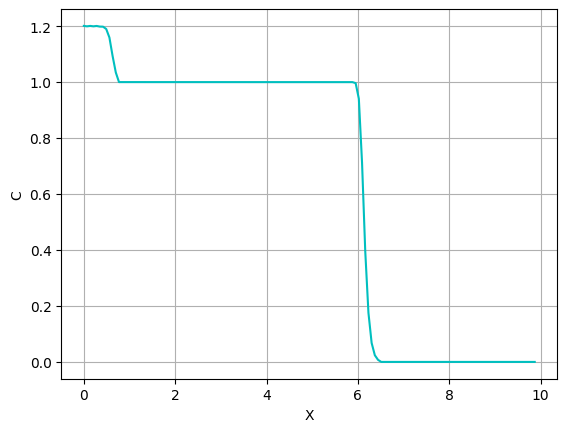

In [73]:
QsItr = []
xItr = []
for deltX in deltXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Superbee (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [74]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


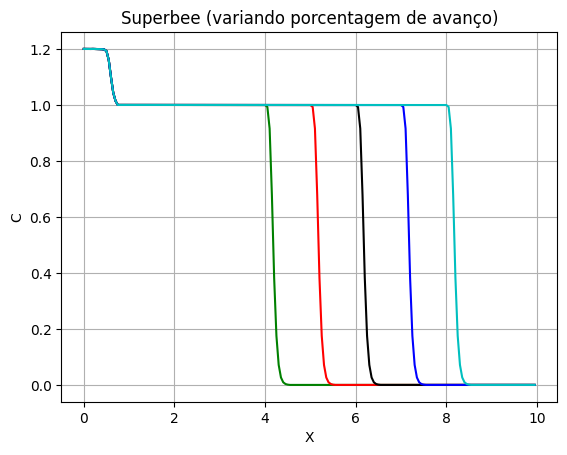

In [75]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Superbee (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [76]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [77]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


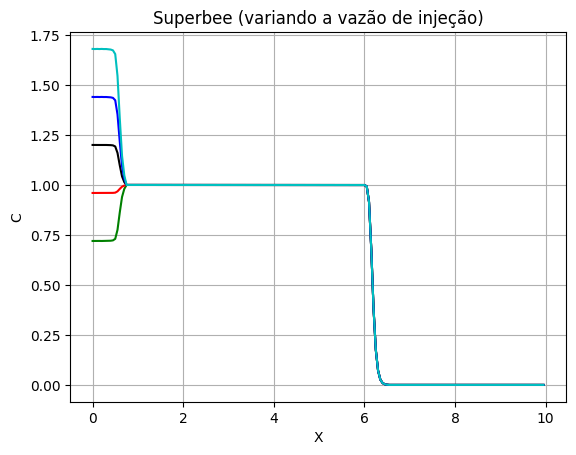

In [78]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Superbee (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [79]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
deltTs = 0.16*np.array([0.3,1.0,1.7])
# percentual de como os volumes estam preenchidos

In [80]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.9*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    C = u*deltT/deltX
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-q0) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - q0))
                )
            elif j == nx-1:
                if abs(qFinal[j] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
            else:
                if abs(qFinal[j+1] -qFinal[j]) < 10**-9: 
                    theta1_2 = 0.0
                else:
                    theta1_2 = ((qFinal[j] - qFinal[j-1])/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = max(0, min(1, 2*theta1_2), min(2,theta1_2))
                qItr.append(
                    qFinal[j] - C*(qFinal[j]-qFinal[j-1]) -(C/2)*(1-C)*(psiTheta1_2*(qFinal[j+1] - qFinal[j]) -psiTheta1_2*(qFinal[j] - qFinal[j-1]))
                )
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.048
numero de passos de tempo: 104
numero de volumes: 200
valor passo de tempo deltaT: 0.16
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.272
numero de passos de tempo: 18


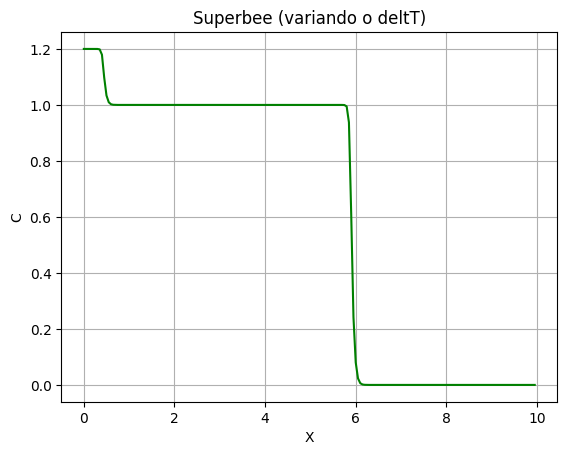

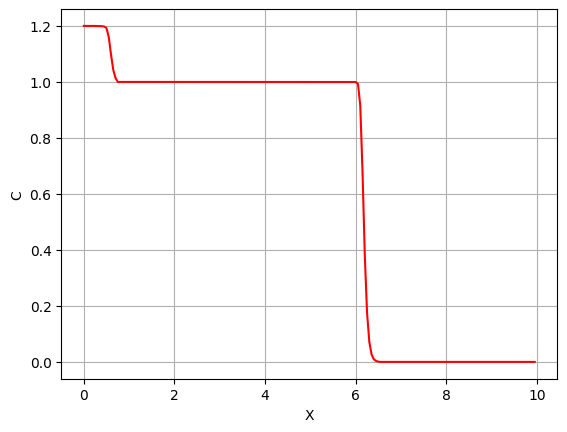

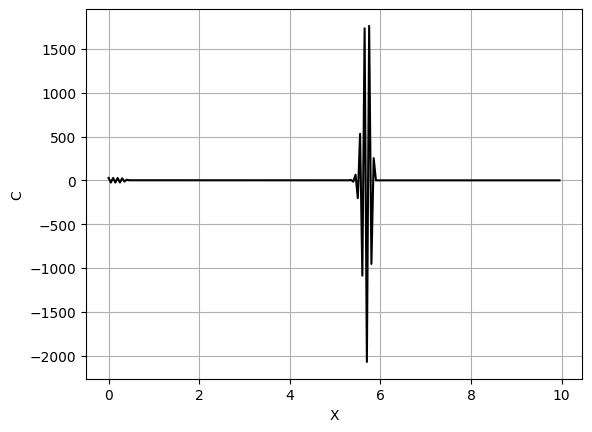

In [81]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Superbee (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

# Trabalho 4

Sabendo que $f(\phi) = \frac{\phi^2}{2}$, logo Smax = ${\phi}_{max}$

Além disso considerando as condições iniciais do trabalho 1

## Conservativo

## Dados do problema
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [22]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
smax = ca*1.2
# percentual de como os volumes estam preenchidos

In [23]:
def metodoEx(ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.95*(deltX/smax)
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    ((1/2)*(qFinal[j]**2)-(1/2)*(q0**2)))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    ((1/2)*(qFinal[j]**2)-(1/2)*(qFinal[j-1]**2)))
        qFinal = qItr
    return espaco, qFinal
    

In [24]:
x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126


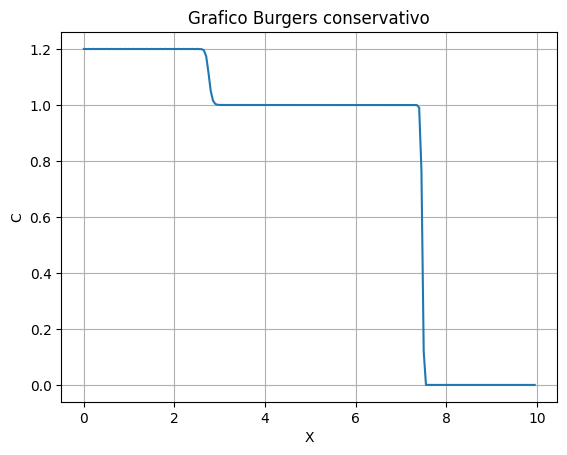

In [25]:
plt.figure()
plt.title(f'Grafico Burgers conservativo')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [36]:
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
smax = ca*1.2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 160
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 240
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 280
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126


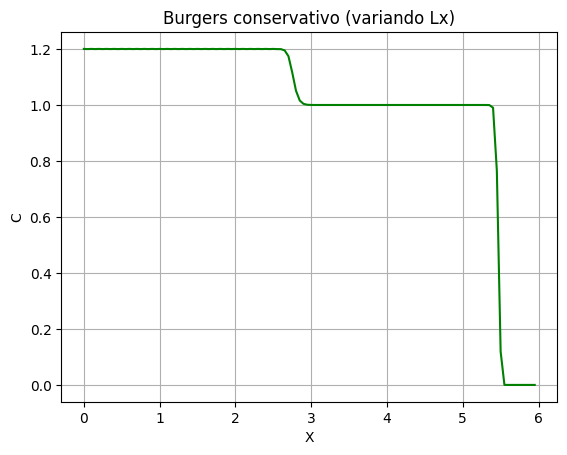

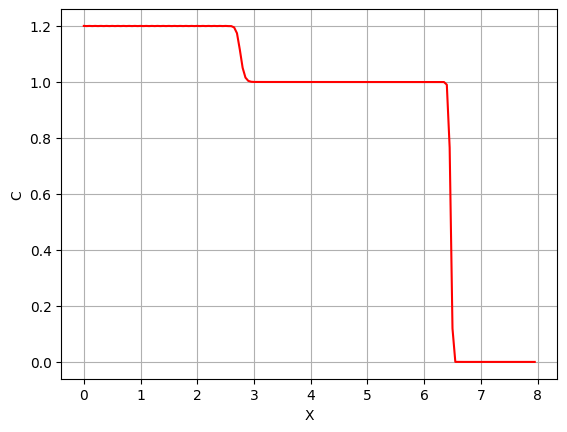

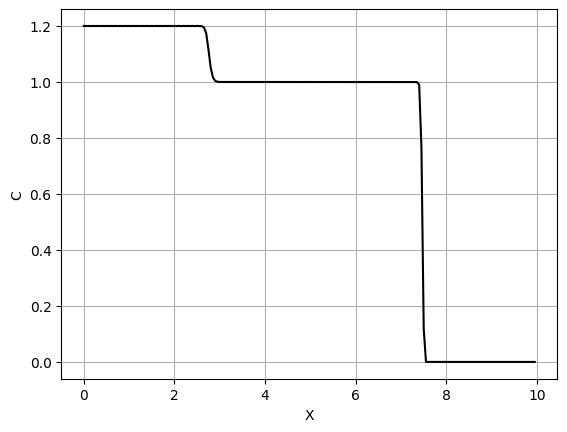

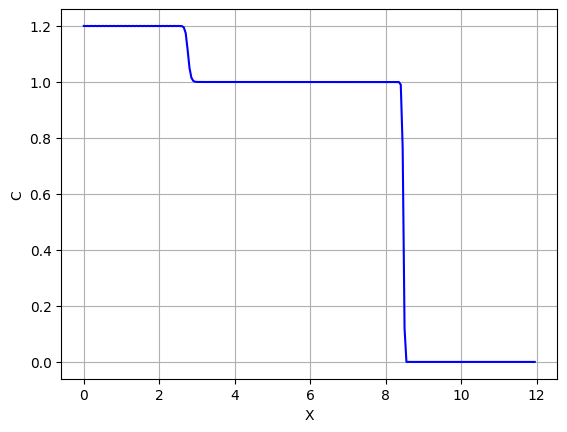

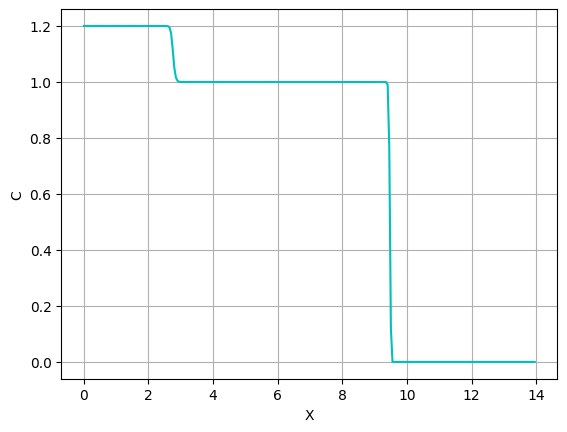

In [37]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers conservativo (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [38]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
smax = ca*1.2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 75
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 101
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 151
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 176


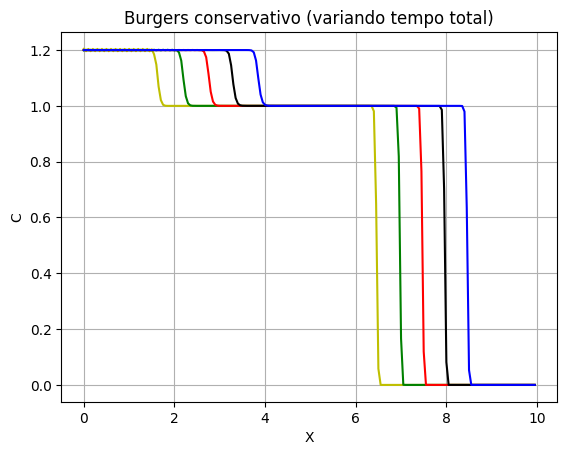

In [39]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Burgers conservativo (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [40]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
smax = ca*1.2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.02375
numero de passos de tempo: 210
numero de volumes: 249
valor passo de tempo deltaT: 0.03166666666666667
numero de passos de tempo: 157
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 166
valor passo de tempo deltaT: 0.0475
numero de passos de tempo: 105
numero de volumes: 142
valor passo de tempo deltaT: 0.055416666666666656
numero de passos de tempo: 90


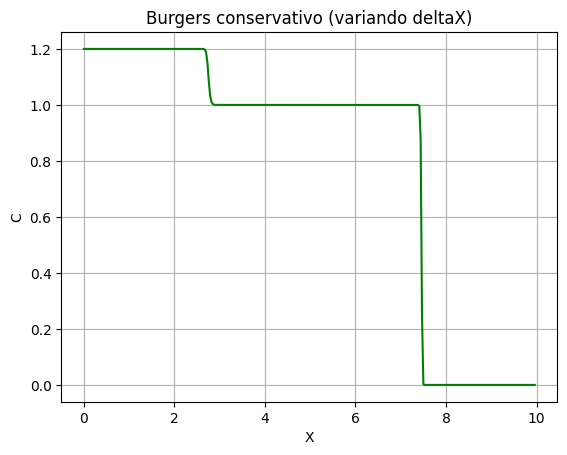

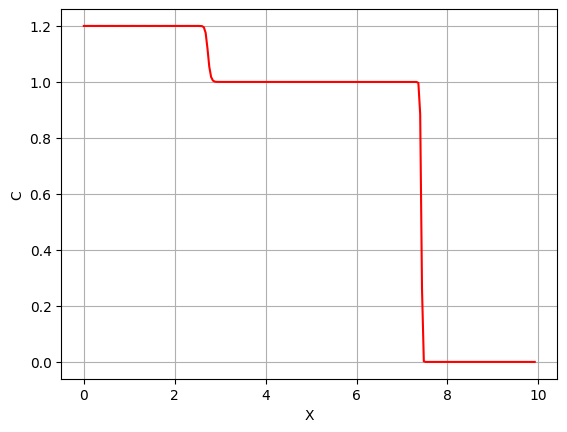

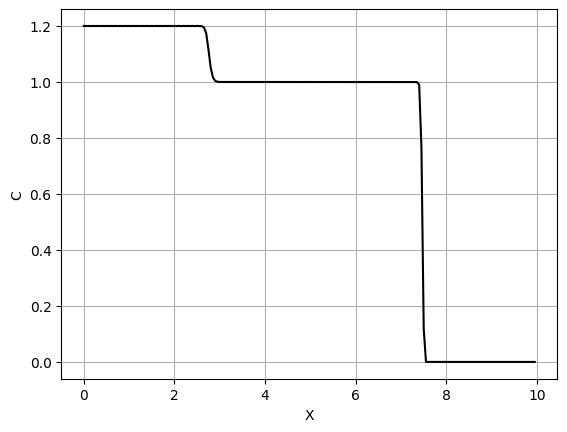

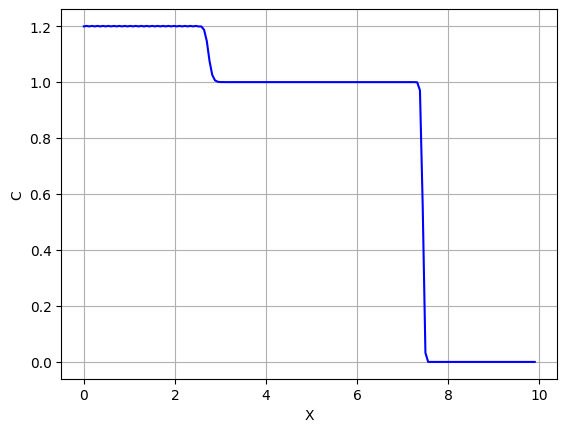

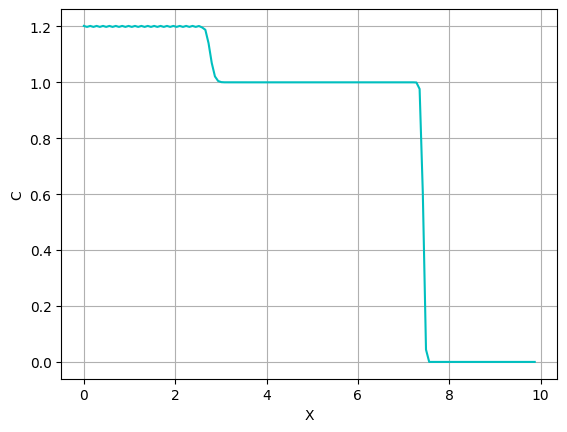

In [41]:
QsItr = []
xItr = []
for deltX in deltXs:
    x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers conservativo (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [42]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
smax = ca*1.2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126


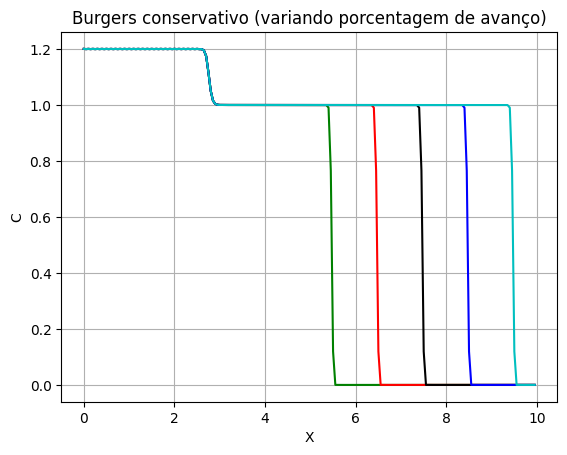

In [43]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers conservativo (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [50]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
smaxs = [1.0, 1.0, 1.2, 1.44,  1.68] 
# percentual de como os volumes estam preenchidos

In [51]:
def metodoExManipulado(ca,cb,lX,tTotal,deltX,porcAvan, cInjItr, smax):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.95*(deltX/smax)
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    ((1/2)*(qFinal[j]**2)-(1/2)*(q0**2)))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    ((1/2)*(qFinal[j]**2)-(1/2)*(qFinal[j-1]**2)))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.0475
numero de passos de tempo: 105
numero de volumes: 200
valor passo de tempo deltaT: 0.0475
numero de passos de tempo: 105
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03298611111111111
numero de passos de tempo: 151
numero de volumes: 200
valor passo de tempo deltaT: 0.028273809523809524
numero de passos de tempo: 176


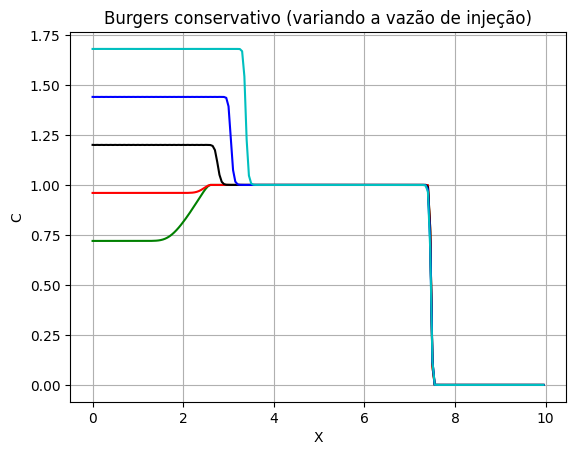

In [52]:
QsItr = []
xItr = []
k = 0
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(ca,cb,lX,tTotal,deltX,porcAvan, cInjItr, smaxs[k])
    xItr = x
    k+=1
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers conservativo (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,039$

In [91]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
smax = 1.2
deltTs = 0.039*np.array([0.3,1.0,1.053])
# percentual de como os volumes estam preenchidos

In [92]:
def metodoExManipulado(ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.95*(deltX/smax)
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    ((1/2)*(qFinal[j]**2)-(1/2)*(q0**2)))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    ((1/2)*(qFinal[j]**2)-(1/2)*(qFinal[j-1]**2)))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.0117
numero de passos de tempo: 427
numero de volumes: 200
valor passo de tempo deltaT: 0.039
numero de passos de tempo: 128
numero de volumes: 200
valor passo de tempo deltaT: 0.041067
numero de passos de tempo: 121


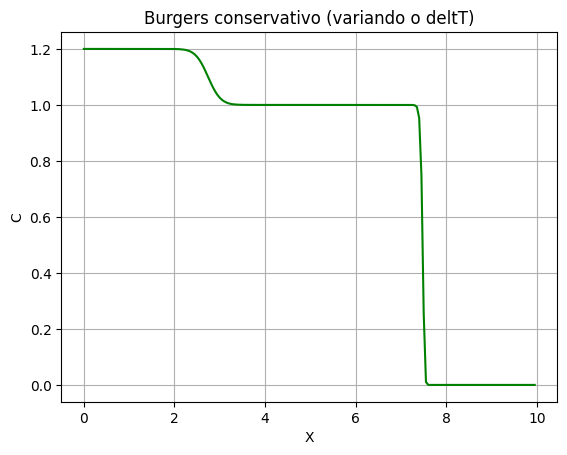

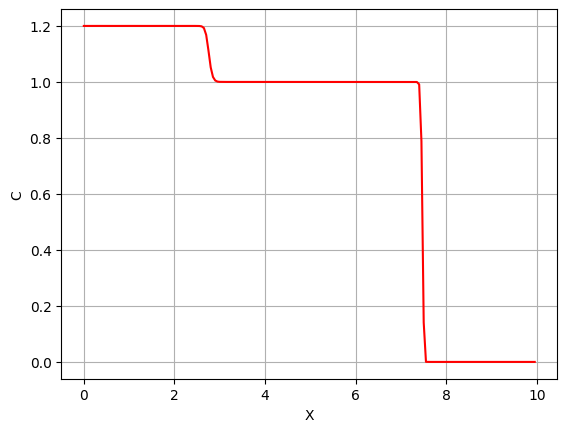

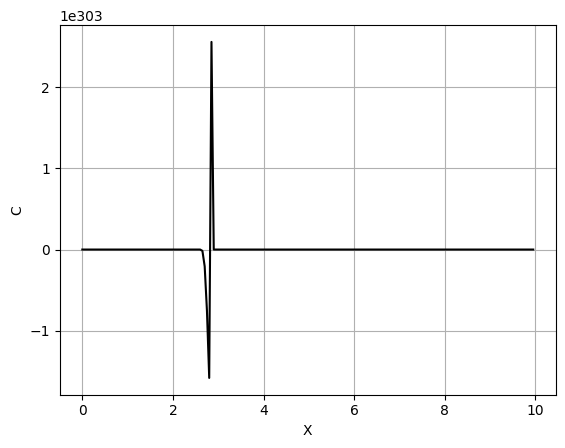

In [93]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers conservativo (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

## Não-conservativo

## Dados do problema
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [94]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
smax = ca*1.2
# percentual de como os volumes estam preenchidos

In [95]:
def metodoEx(ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.95*(deltX/smax)
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    qFinal[j]*(qFinal[j] - q0))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    qFinal[j]*(qFinal[j] - qFinal[j-1]))
        qFinal = qItr
    return espaco, qFinal
    

In [96]:
x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126


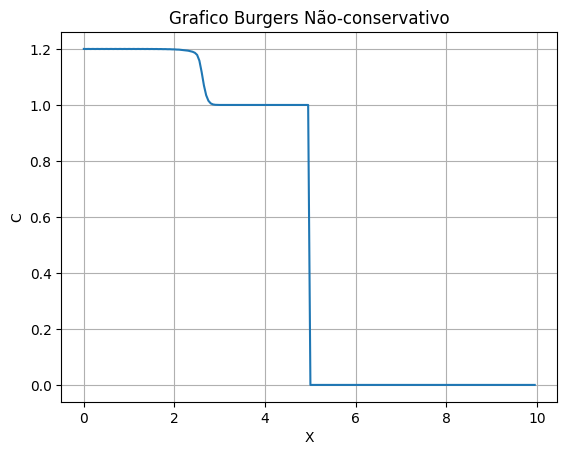

In [97]:
plt.figure()
plt.title(f'Grafico Burgers Não-conservativo')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [98]:
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
smax = ca*1.2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 160
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 240
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 280
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126


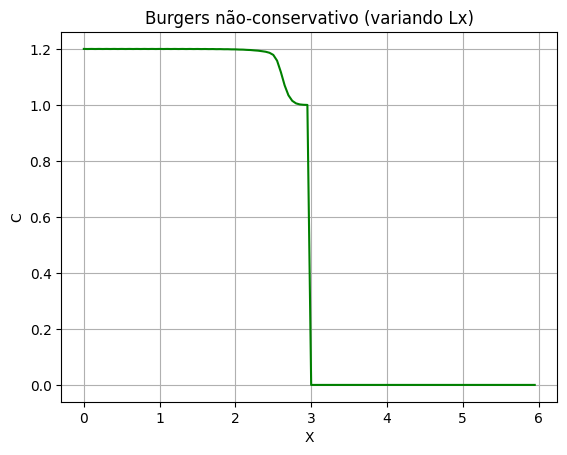

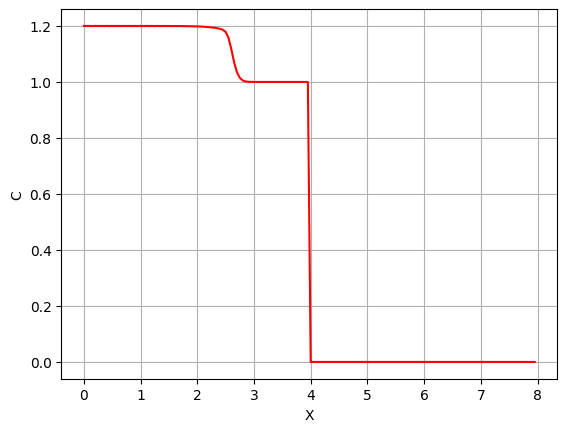

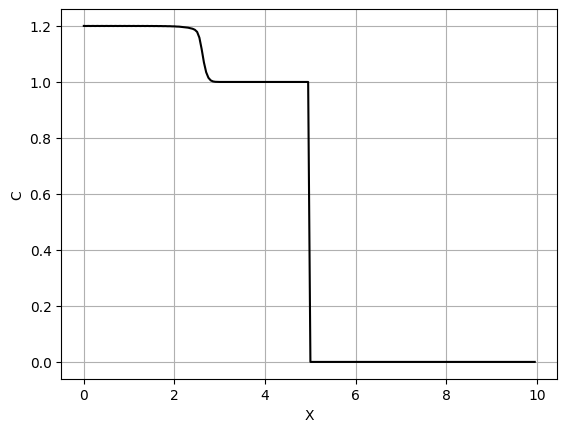

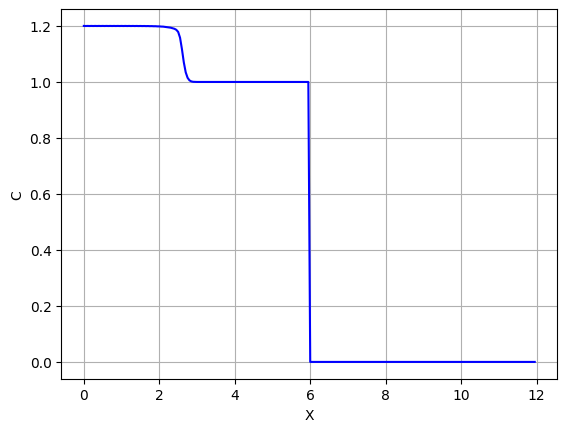

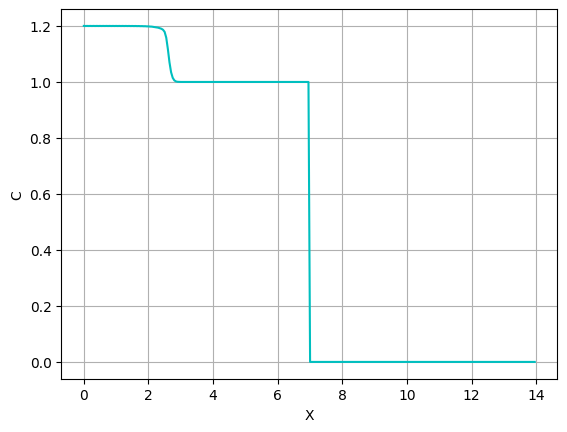

In [99]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers não-conservativo (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [100]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
smax = ca*1.2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 75
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 101
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 151
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 176


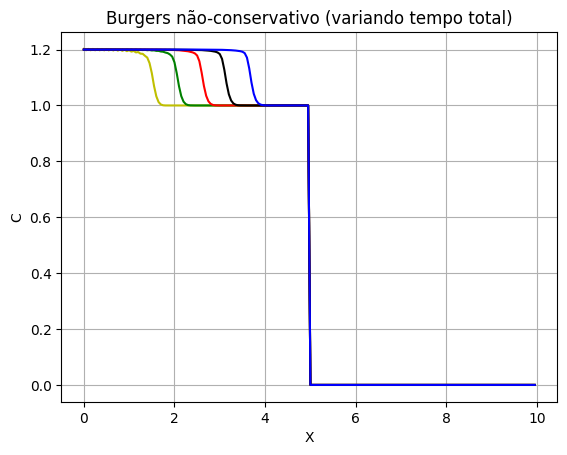

In [101]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Burgers não-conservativo (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [102]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
smax = ca*1.2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.02375
numero de passos de tempo: 210
numero de volumes: 249
valor passo de tempo deltaT: 0.03166666666666667
numero de passos de tempo: 157
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 166
valor passo de tempo deltaT: 0.0475
numero de passos de tempo: 105
numero de volumes: 142
valor passo de tempo deltaT: 0.055416666666666656
numero de passos de tempo: 90


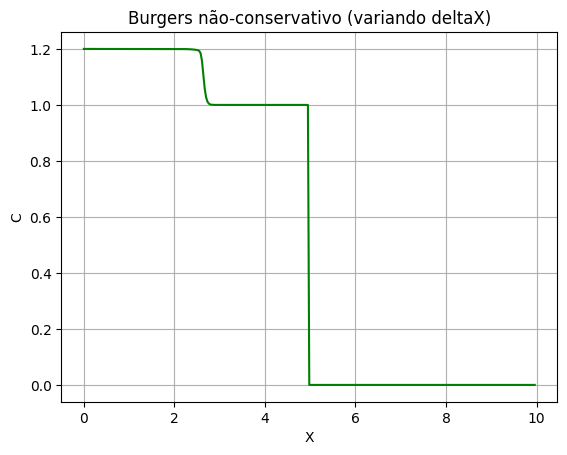

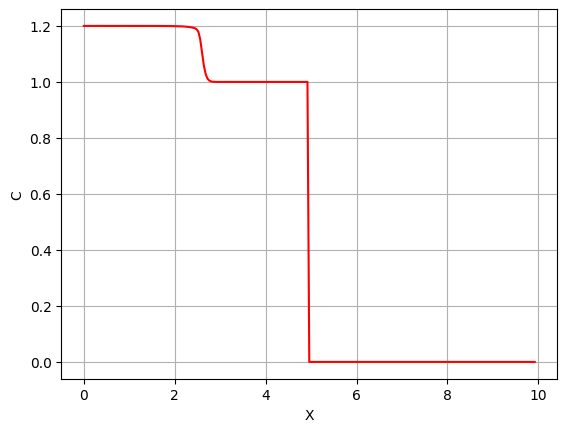

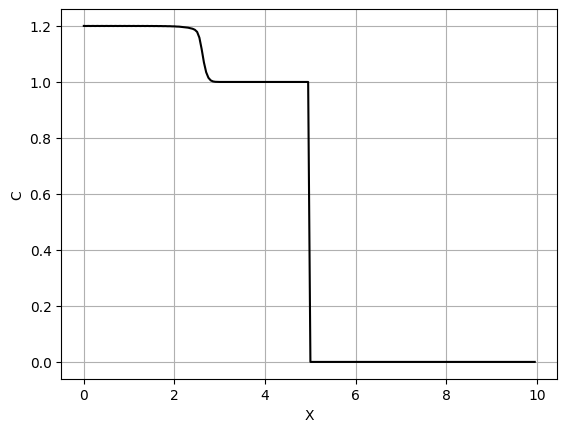

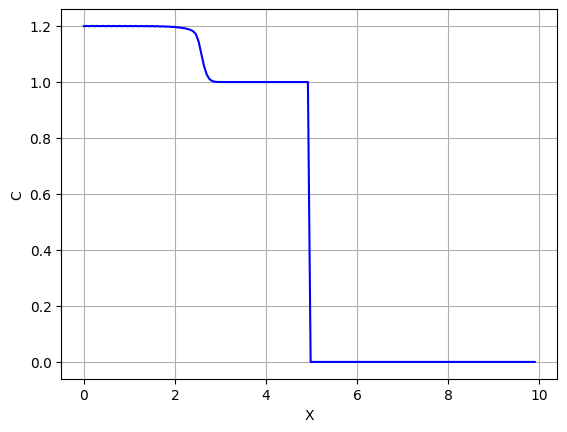

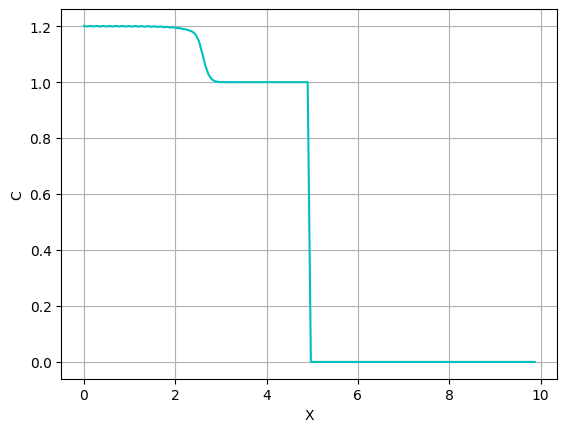

In [103]:
QsItr = []
xItr = []
for deltX in deltXs:
    x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers não-conservativo (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [104]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
smax = ca*1.2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126


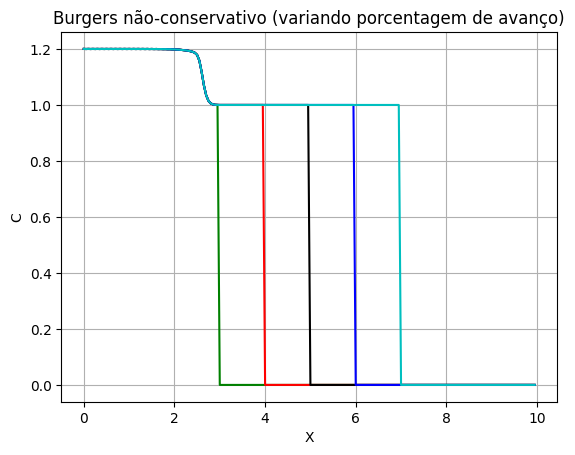

In [105]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers não-conservativo (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [107]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
smaxs = [1.0, 1.0, 1.2, 1.44,  1.68] 
# percentual de como os volumes estam preenchidos

In [108]:
def metodoExManipulado(ca,cb,lX,tTotal,deltX,porcAvan, cInjItr, smax):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.95*(deltX/smax)
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    qFinal[j]*(qFinal[j] - q0))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    qFinal[j]*(qFinal[j] - qFinal[j-1]))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.0475
numero de passos de tempo: 105
numero de volumes: 200
valor passo de tempo deltaT: 0.0475
numero de passos de tempo: 105
numero de volumes: 200
valor passo de tempo deltaT: 0.03958333333333334
numero de passos de tempo: 126
numero de volumes: 200
valor passo de tempo deltaT: 0.03298611111111111
numero de passos de tempo: 151
numero de volumes: 200
valor passo de tempo deltaT: 0.028273809523809524
numero de passos de tempo: 176


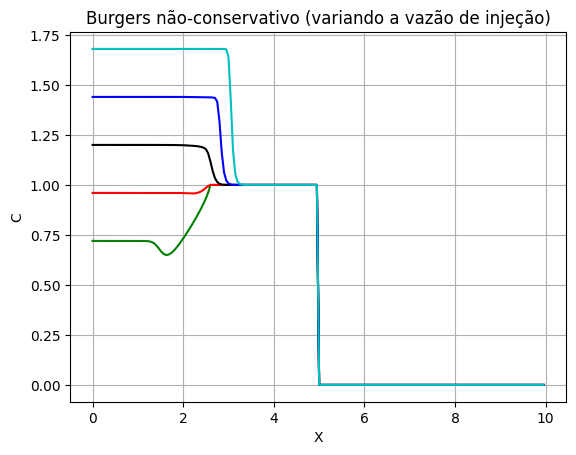

In [109]:
QsItr = []
xItr = []
k = 0
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(ca,cb,lX,tTotal,deltX,porcAvan, cInjItr, smaxs[k])
    xItr = x
    k+=1
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers não-conservativo (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,039$

In [134]:
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
smax = 1.2
deltTs = 0.039*np.array([0.3,1.0,1.17])
# percentual de como os volumes estam preenchidos

In [135]:
def metodoExManipulado(ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.95*(deltX/smax)
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    qFinal[j]*(qFinal[j] - q0))
            else:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    qFinal[j]*(qFinal[j] - qFinal[j-1]))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.0117
numero de passos de tempo: 427
numero de volumes: 200
valor passo de tempo deltaT: 0.039
numero de passos de tempo: 128
numero de volumes: 200
valor passo de tempo deltaT: 0.04563
numero de passos de tempo: 109


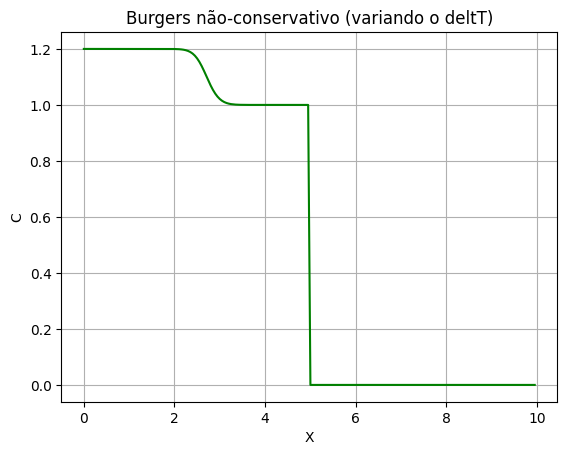

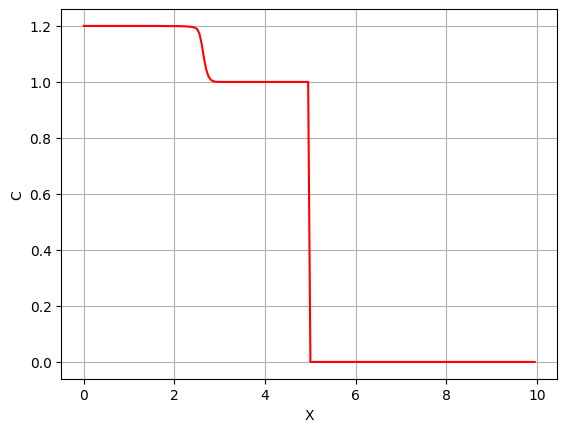

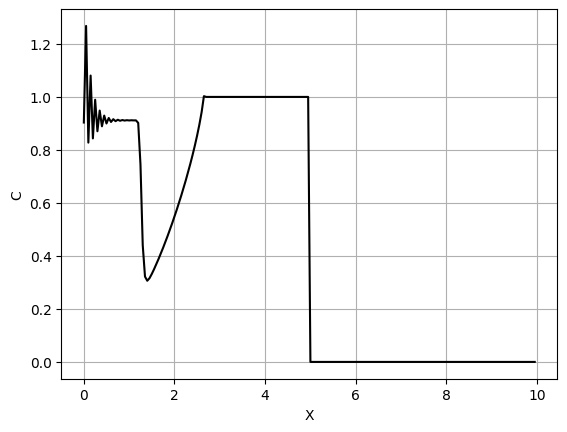

In [136]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Burgers não-conservativo (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()